In [17]:
# Disable warnings in Anaconda
import warnings

import numpy as np
from scipy.interpolate import interp1d

warnings.filterwarnings('ignore')

%matplotlib inline
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
from sklearn.datasets import make_circles
from sklearn.ensemble import (BaggingClassifier, BaggingRegressor,
                              RandomForestClassifier, RandomForestRegressor)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import pandas as pd
import sklearn

In [18]:
# Load data
df = pd.read_csv("./data/dataset_parameters.csv", delimiter=" ")

# Choose the numeric features
df = df[["duration","liters","fixture", "num_fixture"]]
df = df[(df["fixture"]=="washbasin") | (df["fixture"]=="shower") | (df["fixture"]=="shower")]
df.head()
df = sklearn.utils.shuffle(df)
X = np.asarray(df[["duration","liters"]],dtype=float)
max_dur = max(X[:,0])
max_lit = max(X[:,1])
#X[:,0] = X[:,0] /max_dur
#X[:,1] = X[:,1]/max_lit
# print(X)
Y = df["num_fixture"]-3

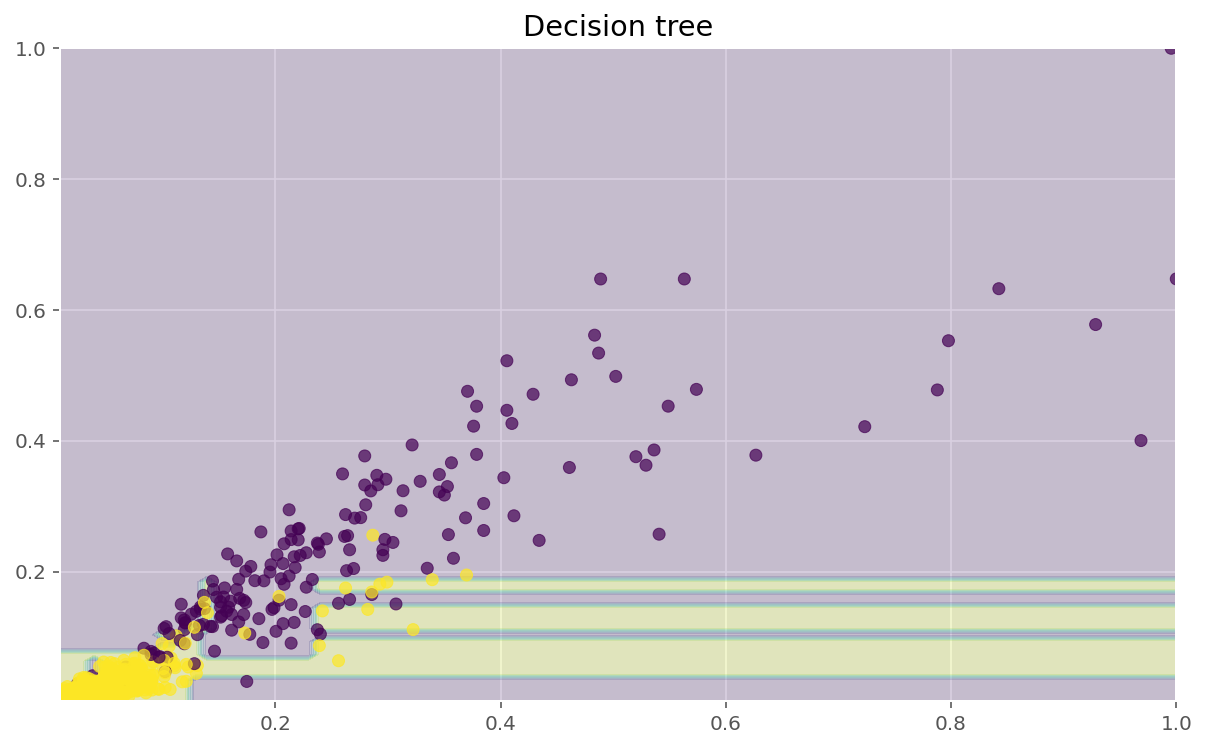

In [19]:

X_train_circles, X_test_circles, y_train_circles, y_test_circles = \
    train_test_split(X, Y, test_size=0.2)

dtree = DecisionTreeClassifier()
dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_range = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx1, xx2 = np.meshgrid(x_range, y_range)
y_hat = dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis', alpha=.7)
plt.title("Decision tree")
plt.show()

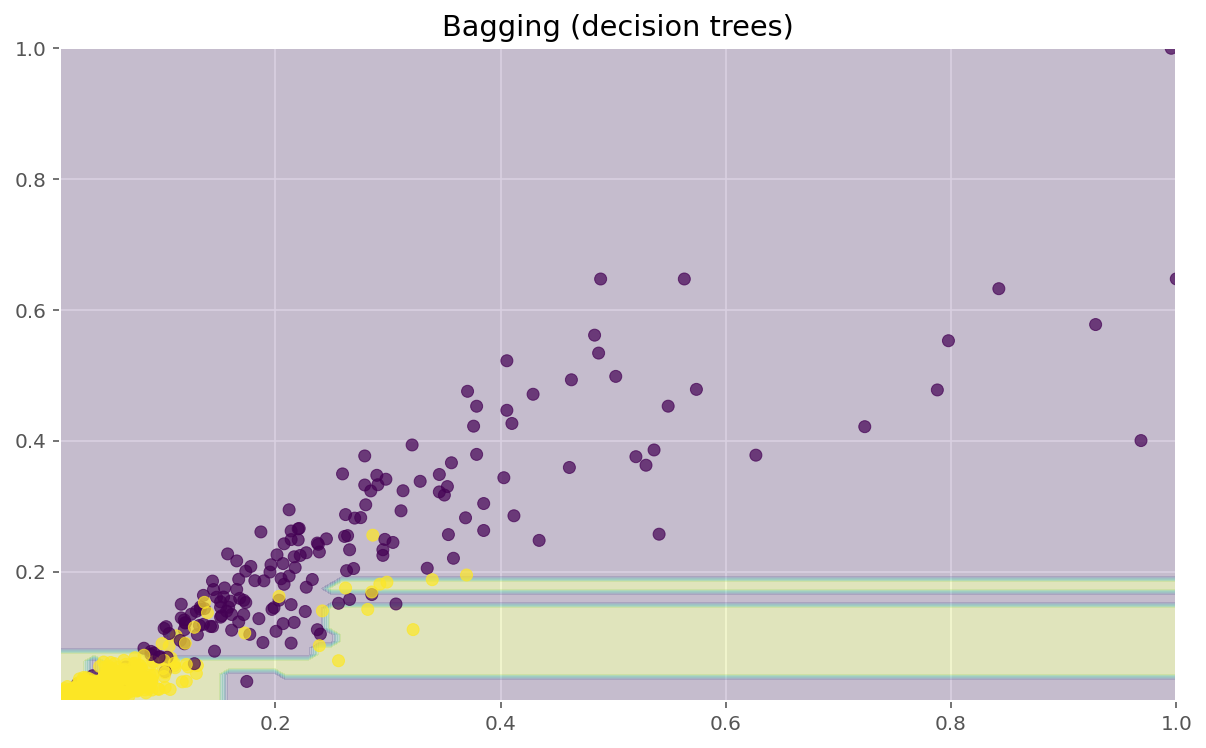

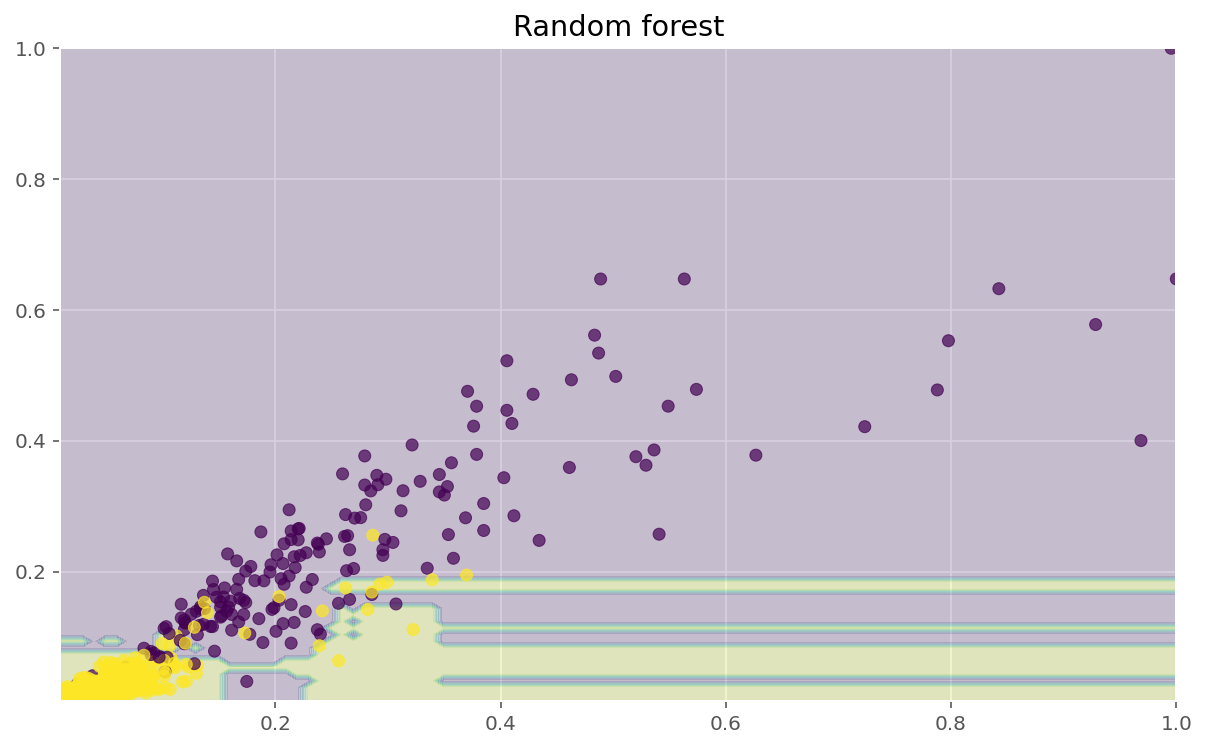

In [20]:
b_dtree = BaggingClassifier(DecisionTreeClassifier(),
                            n_estimators=300, random_state=42)
b_dtree.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_range = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx1, xx2 = np.meshgrid(x_range, y_range)
y_hat = b_dtree.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis', alpha=.7)
plt.title("Bagging (decision trees)")
plt.show()

rf = RandomForestClassifier(n_estimators=300, random_state=42)
rf.fit(X_train_circles, y_train_circles)

x_range = np.linspace(X[:,0].min(), X[:,0].max(), 100)
y_range = np.linspace(X[:,1].min(), X[:,1].max(), 100)
xx1, xx2 = np.meshgrid(x_range, y_range)
y_hat = rf.predict(np.c_[xx1.ravel(), xx2.ravel()])
y_hat = y_hat.reshape(xx1.shape)
plt.contourf(xx1, xx2, y_hat, alpha=0.2)
plt.scatter(X[:,0], X[:,1], c=Y, cmap='viridis', alpha=.7)
plt.title("Random forest")
plt.show()